In [1]:
import numpy as np
import pandas as pd

# Loading DataSet

In [2]:
df=pd.read_csv('D:/Research Work/road/attacks/max_engine_coolant_temp_attack_masquerade.log')
df.head()

,(1100000000.000000) can0 033#000780000F0007D0
0,(1100000000.000001) can0 162#00080003EA11F4CE
1,(1100000000.000002) can0 0A7#2010FA24D125C0A0
2,(1100000000.000997) can0 32D#00000424CC010000
3,(1100000000.002018) can0 576#7FF800003FFC1FC0
4,(1100000000.005084) can0 193#00080803E6E80000


# Converting the data into different column

In [3]:
log_data  = open('D:/Research Work/road/attacks/max_engine_coolant_temp_attack_masquerade.log', 'r')
split_list = []

for line in log_data:
    thing1 = line.split(' ')
    time = thing1[0][1:18]
    idd = thing1[1][:4]
    message = thing1[2][:20]
    

    split_list.append([time, idd, message])

df1 = pd.DataFrame(split_list, columns=['Unix Timestamp', 'Channel', 'IDHexandDataFeild'])
#df1['Message'].map(str.strip)
df1

,Unix Timestamp,Channel,IDHexandDataFeild
0,1100000000.000000,can0,033#000780000F0007D0
1,1100000000.000001,can0,162#00080003EA11F4CE
2,1100000000.000002,can0,0A7#2010FA24D125C0A0
3,1100000000.000997,can0,32D#00000424CC010000
4,1100000000.002018,can0,576#7FF800003FFC1FC0
...,...,...,...
61876,1100000025.873534,can0,FFF#0000000000000000
61877,1100000025.873535,can0,3E4#0134000005000000
61878,1100000025.873536,can0,65C#4011D26750000000
61879,1100000025.874552,can0,577#0000080000000146


# Spliting DataFrame and  Idhex

In [4]:
out = pd.DataFrame(df1.IDHexandDataFeild.str.split('#',1).tolist(),columns=['IDhex','DataFrame'])
out.head()

,IDhex,DataFrame
0,033,000780000F0007D0
1,162,00080003EA11F4CE
2,0A7,2010FA24D125C0A0
3,32D,00000424CC010000
4,576,7FF800003FFC1FC0


# gather unixTimestamp and channel in other dataset

In [5]:
df2=df1[['Unix Timestamp', 'Channel']] 
df2.head()

,Unix Timestamp,Channel
0,1100000000.000000,can0
1,1100000000.000001,can0
2,1100000000.000002,can0
3,1100000000.000997,can0
4,1100000000.002018,can0


# Converting the IDhex in hexadecimal

In [6]:
out['IDhex'] = out['IDhex'].apply(lambda x: int(x,16))
out

,IDhex,DataFrame
0,51,000780000F0007D0
1,354,00080003EA11F4CE
2,167,2010FA24D125C0A0
3,813,00000424CC010000
4,1398,7FF800003FFC1FC0
...,...,...
61876,4095,0000000000000000
61877,996,0134000005000000
61878,1628,4011D26750000000
61879,1399,0000080000000146


# COnverting DataFrame in decimal 

In [7]:
out['DataFrame'] = out['DataFrame'].apply(lambda x: int(x,16))
out

,IDhex,DataFrame
0,51,2111062576990160
1,354,2251816625632462
2,167,2310621644875743392
3,813,4556087951360
4,1398,9221120238114578368
...,...,...
61876,4095,0
61877,996,86694292910768128
61878,1628,4616702434197110784
61879,1399,8796093022534


# Now gathering these two columns data which we convert in decimal

In [8]:
frames=[df2,out]
result=pd.concat(frames ,axis=1)
result.head()

,Unix Timestamp,Channel,IDhex,DataFrame
0,1100000000.000000,can0,51,2111062576990160
1,1100000000.000001,can0,354,2251816625632462
2,1100000000.000002,can0,167,2310621644875743392
3,1100000000.000997,can0,813,4556087951360
4,1100000000.002018,can0,1398,9221120238114578368


# saving the data into speedometer.csv 

In [9]:
#here i have saved my data which i have splitted and  converted in decimal 
save=result.to_csv("D:/Research Work/road/extractedfrompython/speedometer.csv")

In [10]:
result.shape

(61881, 4)

# Droping channel column becasue we have same data in channel column

In [11]:
result = result.loc[:, ~result.columns.str.contains('^Channel')]

result

,Unix Timestamp,IDhex,DataFrame
0,1100000000.000000,51,2111062576990160
1,1100000000.000001,354,2251816625632462
2,1100000000.000002,167,2310621644875743392
3,1100000000.000997,813,4556087951360
4,1100000000.002018,1398,9221120238114578368
...,...,...,...
61876,1100000025.873534,4095,0
61877,1100000025.873535,996,86694292910768128
61878,1100000025.873536,1628,4616702434197110784
61879,1100000025.874552,1399,8796093022534


In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# dataset is big thats why i'm spliting it into 2 chunks

In [13]:
n =31000  #chunk row size
list_df = [result[i:i+n]
for i in range(0,result.shape[0],n)]


In [14]:
res=list_df[0]
res1=list_df[1]
res1


,Unix Timestamp,IDhex,DataFrame
31000,1100000012.961368,304,369435906932736
31001,1100000012.961369,1175,0
31002,1100000012.965320,403,2260612665573376
31003,1100000012.966343,526,5629503519946952703
31004,1100000012.966345,1314,16104819771030119068
...,...,...,...
61876,1100000025.873534,4095,0
61877,1100000025.873535,996,86694292910768128
61878,1100000025.873536,1628,4616702434197110784
61879,1100000025.874552,1399,8796093022534


# seprating dependent and independent variables

In [15]:
X = res.iloc[:, :3].values
y = res.iloc[:, 2].values
print(X,y)

[['1100000000.000000' 51 2111062576990160]
 ['1100000000.000001' 354 2251816625632462]
 ['1100000000.000002' 167 2310621644875743392]
 ...
 ['1100000012.960371' 1072 14152415196484256]
 ['1100000012.961366' 354 2251954064585934]
 ['1100000012.961367' 167 2310621644875743392]] [   2111062576990160    2251816625632462 2310621644875743392 ...
   14152415196484256    2251954064585934 2310621644875743392]


Now Implemneting all 4 algorithms 
<br>
Decision Tree<br>
Random Forest<br>
Knn<br>
SVm
<br>
WithOut hyper parameter tunning

In [16]:
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

# Applying Random Forest

In [17]:
from sklearn import metrics
model= RandomForestClassifier()
model.fit(X_train,y_train)
prediction=model.predict(X_test)
print('Accuracy From Random Forest: ', accuracy_score(y_test, prediction))


Accuracy From Random Forest:  0.5880645161290322


# Applying Decision Tree

In [19]:
DT = DecisionTreeClassifier()
DT.fit(X_train, y_train)
prediction=DT.predict(X_test)
print('Accuracy DEcision Tree: ', accuracy_score(y_test, prediction))  




Accuracy DEcision Tree:  0.589247311827957


# Applying SVM

In [ ]:
from sklearn import metrics
from sklearn import svm
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score





In [21]:
svm_m=SVC()
svm_m.fit(X_train,y_train)
prediction=svm_m.predict(X_test)
print('Accuracy: ', accuracy_score(y_test, prediction), '\n')



Accuracy:  0.20043010752688173 



# Applying KNN

In [46]:
knn1 = KNeighborsClassifier(n_neighbors=1)
knn1.fit(X_train, y_train)

prediction=knn1.predict(X_test)

print('Accuracy From KNN: ', accuracy_score(y_test, prediction))



Accuracy From KNN:  0.7851612903225806


# Let's try hyperperameter and check if there is any change in accuracy or not

Here we are seeing that only knn is giving better accuarcy among 4 algorithms so let's tune hyper perameter and check either accuarcy is incresing or not

In [20]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score

All Accuracies:  [       nan 0.50967742 0.51428571 0.51336406 0.52626728 0.51152074
 0.5281106         nan 0.53548387 0.54654378 0.50691244 0.54101382
        nan 0.55760369        nan 0.49124424 0.5124424  0.52073733
 0.51152074 0.5124424 ] 

Mean of all Accuracies:  nan 

Standard Deviation:  nan


Text(0, 0.5, 'Cross-Validated Accuracy')

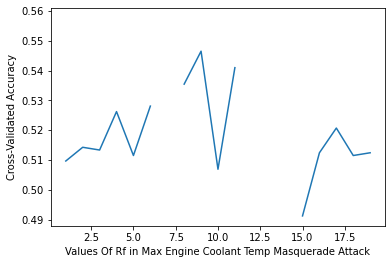

In [21]:
feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
X_test = feature_scaler.transform(X_test)

classifier = RandomForestClassifier(n_estimators=15, random_state=0)

all_accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=20)

print('All Accuracies: ', all_accuracies, '\n')

print('Mean of all Accuracies: ', all_accuracies.mean(), '\n')
print('Standard Deviation: ', all_accuracies.std())

plt.plot(all_accuracies)
plt.xlabel('Values Of Rf in Max Engine Coolant Temp Masquerade Attack')
plt.ylabel('Cross-Validated Accuracy')


All Accuracies:  [0.80193548 0.8        0.79548387 0.78516129 0.80129032 0.79870968
 0.8116129  0.81096774 0.8        0.80645161 0.79225806 0.78193548
 0.80967742 0.80709677 0.79806452 0.79096774 0.78903226 0.79870968
 0.80645161 0.79806452] 

Mean of all Accuracies:  0.7991935483870969 

Standard Deviation:  0.008106664053799518


Text(0, 0.5, 'Cross-Validated Accuracy')

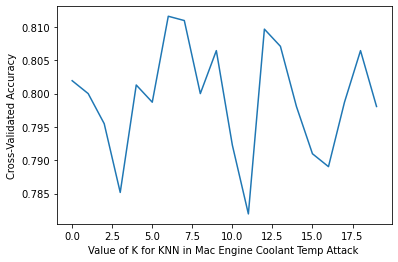

In [22]:
knn = KNeighborsClassifier(n_neighbors=1)

scores = cross_val_score(knn, X, y, cv=20, scoring='accuracy')
print('All Accuracies: ', scores, '\n')

print('Mean of all Accuracies: ', scores.mean(), '\n')
print('Standard Deviation: ', scores.std())

plt.plot(scores)
plt.xlabel('Value of K for KNN in Mac Engine Coolant Temp Attack ')
plt.ylabel('Cross-Validated Accuracy')


# by keeping neighbour value 10

All Accuracies:  [0.70903226 0.71032258 0.71612903 0.71677419 0.72645161 0.73032258
 0.72709677 0.72064516 0.72129032 0.72129032 0.72387097 0.72258065
 0.72516129 0.71483871 0.70967742 0.71483871 0.71354839 0.71290323
 0.71032258 0.70516129] 

Mean of all Accuracies:  0.7176129032258065 

Standard Deviation:  0.006861495818691953


Text(0, 0.5, 'Cross-Validated Accuracy')

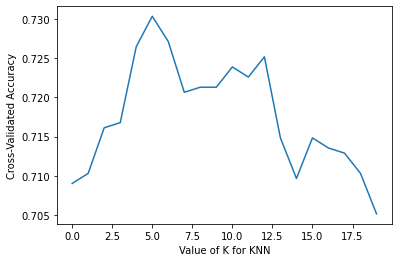

In [49]:
knn = KNeighborsClassifier(n_neighbors=10)

scores = cross_val_score(knn, X, y, cv=20, scoring='accuracy')
print('All Accuracies: ', scores, '\n')

print('Mean of all Accuracies: ', scores.mean(), '\n')
print('Standard Deviation: ', scores.std())

plt.plot(scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')


# implementing Hyperperameter tunning in Decision Tree Algorithm

All Accuracies:  [0.62119816 0.62396313 0.60460829 0.6156682  0.60184332 0.6
 0.62949309 0.62488479 0.61843318 0.61198157 0.60921659 0.61658986
 0.61935484 0.61658986 0.60921659 0.59907834 0.60921659 0.60645161
 0.60829493 0.6156682 ] 

Mean of all Accuracies:  0.6130875576036867 

Standard Deviation:  0.008298002503481939


Text(0, 0.5, 'Cross-Validated Accuracy')

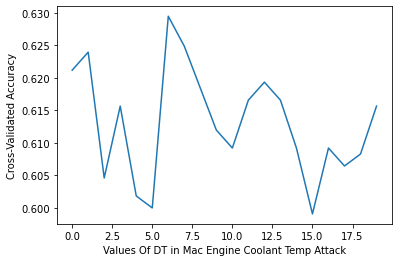

In [23]:
feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
X_test = feature_scaler.transform(X_test)

classifier = DecisionTreeClassifier(criterion ="entropy", splitter ="random", max_depth =5,  min_samples_split =5,
                              min_samples_leaf =2, max_features =2)

all_accuracies = cross_val_score(estimator=DT, X=X_train, y=y_train, cv=20)

print('All Accuracies: ', all_accuracies, '\n')

print('Mean of all Accuracies: ', all_accuracies.mean(), '\n')
print('Standard Deviation: ', all_accuracies.std())

plt.plot(all_accuracies)
plt.xlabel('Values Of DT in Mac Engine Coolant Temp Attack')
plt.ylabel('Cross-Validated Accuracy')


# Implementing hyperperamter tunning in Random Forest

All Accuracies:  [0.47603687 0.47511521 0.4516129  0.47142857 0.48986175 0.44884793
 0.47373272 0.49400922 0.47511521 0.48387097] 

Mean of all Accuracies:  0.47396313364055304 

Standard Deviation:  0.013771401924589652


Text(0, 0.5, 'Cross-Validated Accuracy')

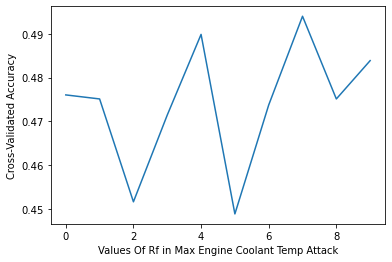

In [24]:
feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
X_test = feature_scaler.transform(X_test)

classifier = RandomForestClassifier(n_estimators=3, random_state=0)

all_accuracies = cross_val_score(estimator=classifier, X=X_train, y=y_train, cv=10)

print('All Accuracies: ', all_accuracies, '\n')

print('Mean of all Accuracies: ', all_accuracies.mean(), '\n')
print('Standard Deviation: ', all_accuracies.std())

plt.plot(all_accuracies)
plt.xlabel('Values Of Rf in Max Engine Coolant Temp Attack')
plt.ylabel('Cross-Validated Accuracy')


# SVM



In [ ]:
svm_m=SVC()
svm_m.fit(X_train,y_train)
prediction=svm_m.predict(X_test)
#print('Accuracy: ', accuracy_score(y_test, prediction), '\n')



All Accuracies:  [0.27926267 0.28110599 0.28940092 0.28940092 0.27741935 0.28018433
 0.2875576  0.29032258 0.29308756 0.28479263 0.28018433 0.2875576
 0.28940092 0.27926267 0.28387097 0.28387097 0.28294931 0.28110599
 0.28110599 0.28479263] 

Mean of all Accuracies:  0.28433179723502305 

Standard Deviation:  0.004347456742883233


Text(0, 0.5, 'Cross-Validated Accuracy')

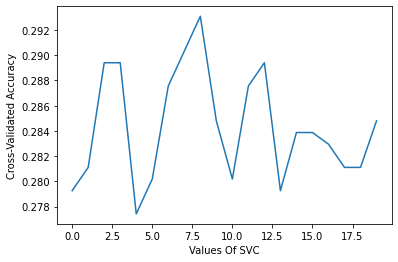

In [53]:
feature_scaler = StandardScaler()
X_train = feature_scaler.fit_transform(X_train)
X_test = feature_scaler.transform(X_test)

model3 = SVC(C= 5,random_state=0,decision_function_shape='ovr')

all_accuracies = cross_val_score(estimator=model3, X=X_train, y=y_train, cv=20)

print('All Accuracies: ', all_accuracies, '\n')

print('Mean of all Accuracies: ', all_accuracies.mean(), '\n')
print('Standard Deviation: ', all_accuracies.std())

plt.plot(all_accuracies)
plt.xlabel('Values Of SVC')
plt.ylabel('Cross-Validated Accuracy')


Random Forest: nan (nan)
KNN: 0.671419 (0.102800)
Decison Tree: nan (nan)


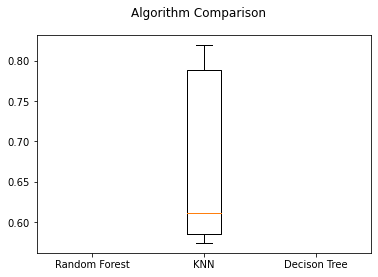

In [26]:
from sklearn import model_selection
models = []
#seed = 20
#models.append(('LR', LogisticRegression()))
#models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('Random Forest', RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('Decison Tree', DecisionTreeClassifier()))
models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10)
    cv_results = model_selection.cross_val_score(model, X, y, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)
# boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()